In [80]:
import pandas as pd

'''readJSON = pd.read_json('V_OCORRENCIA_AMPLA.json')'''
readFile = pd.read_csv('./files/V_OCORRENCIA_AMPLA.csv', sep =';', encoding = 'iso-8859-1', skiprows= 1)

readFile.info()
'''print(readJSON.head())'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13439 entries, 0 to 13438
Data columns (total 45 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Numero_da_Ocorrencia              13439 non-null  int64  
 1   Numero_da_Ficha                   13435 non-null  object 
 2   Operador_Padronizado              13330 non-null  object 
 3   Classificacao_da_Ocorrencia       13437 non-null  object 
 4   Data_da_Ocorrencia                13439 non-null  object 
 5   Hora_da_Ocorrencia                9784 non-null   object 
 6   Municipio                         9741 non-null   object 
 7   UF                                13420 non-null  object 
 8   Regiao                            12686 non-null  object 
 9   Descricao_do_Tipo                 10420 non-null  object 
 10  ICAO                              4629 non-null   object 
 11  Latitude                          9440 non-null   object 
 12  Long

'print(readJSON.head())'

In [81]:
readFile.head()

,Numero_da_Ocorrencia,Numero_da_Ficha,Operador_Padronizado,Classificacao_da_Ocorrencia,Data_da_Ocorrencia,Hora_da_Ocorrencia,Municipio,UF,Regiao,Descricao_do_Tipo,...,Lesoes_Desconhecidas_Tripulantes,Lesoes_Desconhecidas_Passageiros,Lesoes_Desconhecidas_Terceiros,Modelo,CLS,Tipo_ICAO,PMD,Numero_de_Assentos,Nome_do_Fabricante,PSSO
0,1649,mar/11,ODILO LIBRELOTTO,Acidente,2011-01-15,NaN,NaN,MT,Centro-Oeste,PERDA DE CONTROLE NO SOLO,...,0.0,0.0,0.0,EMB-202,L1P,IPAN,1800.0,1.0,NEIVA,verdadeiro
1,1648,53/2011,TAM,OcorrÃªncia Anormal,2011-01-15,NaN,NaN,SP,Sudeste,NaN,...,0.0,0.0,0.0,A320-232,L2J,A320,77000.0,166.0,AIRBUS S.A.S.,verdadeiro
2,1647,jun/11,GLEITON ZANETTA BORBA,OcorrÃªncia Anormal,2011-01-15,NaN,NaN,PR,Sul,NaN,...,0.0,0.0,0.0,58,L2P,BE58,2449.0,6.0,BEECH AIRCRAFT,verdadeiro
3,1646,32/2011,TAM,Incidente,2011-01-14,NaN,NaN,MA,Nordeste,COLISÃO COM AVE,...,0.0,0.0,0.0,A320-232,L2J,A320,70000.0,184.0,AIRBUS S.A.S.,verdadeiro
4,1645,mai/11,LIDER TAXI AEREO S/A â AIR BRASIL,Incidente,2011-01-14,NaN,NaN,SP,Sudeste,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,...,0.0,0.0,0.0,390,L2J,PRM1,5670.0,8.0,RAYTHEON AIRCRAFT,verdadeiro


In [82]:
data_ocorrencias = readFile['Data_da_Ocorrencia']

readFile['Data_da_Ocorrencia'] = pd.to_datetime(readFile['Data_da_Ocorrencia'])

primeira_data = data_ocorrencias.min()
ultima_data = data_ocorrencias.max()

print("Primeira data ->", primeira_data);
print("Ultima data ->", ultima_data);

Primeira data -> 1959-01-11
Ultima data -> 2024-02-21


1 - Verificar hipótese: número de fatalidades tem diminuido com os anos
Passos:

Verificar nome das colunas que contém fatalidades
Criar nova coluna contendo soma de diferentes tipos de fatalidades
Criar nova coluna com o ano do incidente
Criar array com a soma dos valores por ano
Fazer figura com o número de fatalidade por ano
Bonus: identifique quais foram os anos com mais fatalidades e tente descobrir o porquê.


In [83]:
readFile['Fatalidades'] = readFile['Lesoes_Fatais_Tripulantes'].astype(float) + readFile['Lesoes_Fatais_Passageiros'].astype(float) + readFile['Lesoes_Fatais_Terceiros'].astype(float)
readFile['AnoIncidente'] = readFile['Data_da_Ocorrencia'].dt.year

#filtra fatalidades != NaN
lesoes_fatais = readFile['Fatalidades'].dropna()

fatalidades_por_ano = readFile.groupby('AnoIncidente')['Fatalidades'].sum()

print(fatalidades_por_ano)

AnoIncidente
1959      0.0
1979      0.0
1981      0.0
1989      2.0
1996      0.0
1997      7.0
1998      4.0
1999      0.0
2000      0.0
2001     82.0
2002     74.0
2003     71.0
2004     80.0
2005     38.0
2006    208.0
2007    271.0
2008     58.0
2009     65.0
2010     53.0
2011    110.0
2012    112.0
2013     94.0
2014     85.0
2015     82.0
2016    106.0
2017     55.0
2018     77.0
2019     68.0
2020     30.0
2021      0.0
2022      0.0
2023      8.0
2024      0.0
Name: Fatalidades, dtype: float64


<Axes: xlabel='AnoIncidente'>

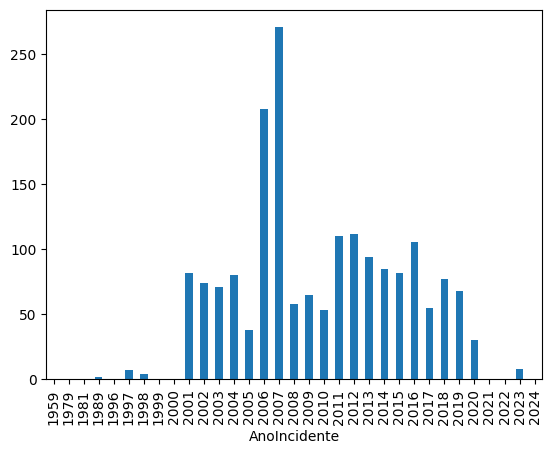

In [84]:
fatalidades_por_ano.plot(kind='bar')

AnoIncidente
2007    271.0
2006    208.0
2012    112.0
2011    110.0
2016    106.0
Name: Fatalidades, dtype: float64


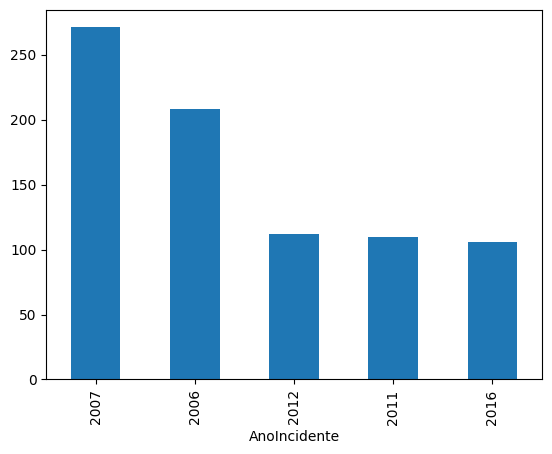

In [85]:
cinco_maiores_anos = fatalidades_por_ano.nlargest(5)
cinco_maiores_anos.plot(kind='bar')
print(cinco_maiores_anos)

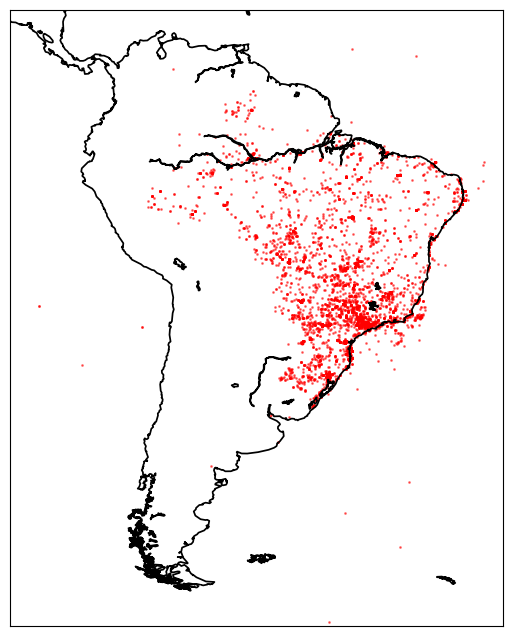

In [100]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

m = Basemap(resolution='l', lon_0=-60, llcrnrlon=-90, llcrnrlat=-60, urcrnrlon=-30, urcrnrlat=15)

fig = plt.figure(figsize=(10,8))

m.drawcoastlines(linewidth=1.25)

# obter posicoes sem na (dropna)
posicoes = readFile[readFile['Longitude'].notna() & readFile['Latitude'].notna()]
# obter longitude (sem ,)
longitude = posicoes['Longitude'].str.replace(',', '.').astype(float)
# obter latitude (sem ,)
latitude = posicoes['Latitude'].str.replace(',', '.').astype(float)


m.scatter(longitude, latitude, s=1, c='red', alpha=0.5)

plt.show()
